In [21]:
!pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import os
from PIL import Image
import pandas as pd
import glob
from IPython.display import HTML

def process_images(folder_path):
    if not os.path.exists(folder_path):
        print("Папка не существует.")
        return None

    image_data = []

    files = glob.glob(os.path.join(folder_path, '*'))

    for file in files:
        file_info = {'Filename': os.path.basename(file), 'Full Path': os.path.abspath(file)}

        try:
            with Image.open(file) as image:
                file_info.update({
                    'Color Model': image.mode,
                    'Format': image.format,
                    'Channels': len(image.getbands()),
                    'Size': round(os.path.getsize(file) / (1024 * 1024), 2),
                    'Width': image.width,
                    'Height': image.height
                })

                # Изменение размера с сохранением пропорций
                aspect_ratio = image.width / image.height
                new_width = 100
                new_height = int(new_width / aspect_ratio)
                resized_image = image.resize((new_width, new_height))
                file_info['Image'] = resized_image

                image_data.append(file_info)

        except Exception as e:
            print(f"Файл {file} не является изображением.")

    df = pd.DataFrame(image_data)
    return df

def image_formatter(img, temp_folder='temp_images'):
    if not os.path.exists(temp_folder):
        os.makedirs(temp_folder)

    if isinstance(img, Image.Image):
        temp_path = os.path.join(temp_folder, f'temp_image_{id(img)}.png')
        img.save(temp_path)
        return f'<img src="{temp_path}" style="width:100px; height:auto;">'

html_style = """
    <style>
        table.dataframe img {
            max-width: 200px;
            max-height: 200px;
        }
    </style>
"""

folder_path = 'images'
result_df = process_images(folder_path)

if result_df is not None:
    result_df['Image'] = result_df['Image'].apply(image_formatter)
    display(HTML(html_style + result_df.to_html(escape=False, render_links=True)))

,Filename,Full Path,Color Model,Format,Channels,Size,Width,Height,Image
0,210602-doge-meme-nft-mb-1715-8afb7e.webp,C:\Users\rkuck\Python\Lab4\images\210602-doge-meme-nft-mb-1715-8afb7e.webp,RGB,WEBP,3,0.07,1500,845,
1,b9c47ef70bff06613d397abfce02c6e7.jpg,C:\Users\rkuck\Python\Lab4\images\b9c47ef70bff06613d397abfce02c6e7.jpg,RGB,JPEG,3,0.06,736,726,
2,bruh.gif,C:\Users\rkuck\Python\Lab4\images\bruh.gif,P,GIF,1,0.01,220,303,
3,confused-guy-meme-content-2018-652x367.jpg,C:\Users\rkuck\Python\Lab4\images\confused-guy-meme-content-2018-652x367.jpg,RGB,JPEG,3,0.02,652,367,
4,Grumpy-Cat-2015-memes.webp,C:\Users\rkuck\Python\Lab4\images\Grumpy-Cat-2015-memes.webp,RGB,WEBP,3,0.10,1600,1067,
5,images (12).jpg,C:\Users\rkuck\Python\Lab4\images\images (12).jpg,RGB,JPEG,3,0.01,299,168,
6,images (13).jpg,C:\Users\rkuck\Python\Lab4\images\images (13).jpg,RGB,JPEG,3,0.01,300,168,
7,images (14).jpg,C:\Users\rkuck\Python\Lab4\images\images (14).jpg,RGB,JPEG,3,0.01,225,225,
8,images (2).png,C:\Users\rkuck\Python\Lab4\images\images (2).png,P,PNG,1,0.00,213,237,
9,josh_hutcherson_whistle.jpg,C:\Users\rkuck\Python\Lab4\images\josh_hutcherson_whistle.jpg,RGB,JPEG,3,0.34,3000,1680,


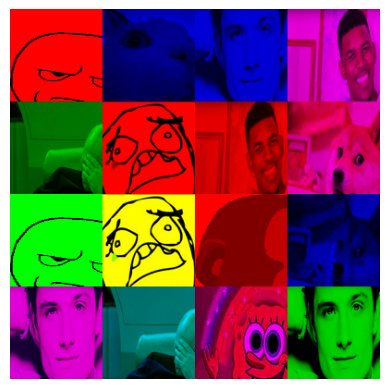

In [10]:
import random
from PIL import Image
import matplotlib.pyplot as plt
import os

def apply_filter(r, g, b, filter_choice):
    if filter_choice == 'red':
        return (r, 0, 0)
    elif filter_choice == 'green':
        return (0, g, 0)
    elif filter_choice == 'blue':
        return (0, 0, b)
    elif filter_choice == 'yellow':
        return (r, g, 0)
    elif filter_choice == 'purple':
        return (r, 0, b)
    elif filter_choice == 'skyblue':
        return (0, g, b)
    else:
        return (r, g, b)

def create_poster(folder_path, output_name, num_rows, num_cols):
    image_files = os.listdir(folder_path)
    poster_images = []

    for _ in range(num_rows * num_cols):
        random_image_name = random.choice(image_files)
        random_image_path = os.path.join(folder_path, random_image_name)
        img = Image.open(random_image_path)
        img = img.resize((150, 150))
        
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        width, height = img.size
        pixels = img.load()
        filter_choice = random.choice(['red', 'green', 'blue', 'yellow', 'purple', 'skyblue'])
        
        for y in range(height):
            for x in range(width):
                r, g, b = img.getpixel((x, y))
                pixels[x, y] = apply_filter(r, g, b, filter_choice)

        poster_images.append(img)

    poster_width = num_cols * 100
    poster_height = num_rows * 100
    poster = Image.new('RGB', (poster_width, poster_height))

    for i in range(num_rows):
        for j in range(num_cols):
            img = poster_images[i * num_cols + j]
            poster.paste(img, (j * 100, i * 100))

    poster.save(output_name)
    return poster

folder_path = 'images'
output_name = 'poster.png'
new_poster = create_poster(folder_path, output_name, 4, 4)

plt.imshow(new_poster)
plt.axis("off")
plt.show()